# K-Means Clustering

Unsupervised method (uses only position of each point).

- Can uncover interesting groupins of people/behavior/things.

Split data into K groups that are closest to K centroids:

1. Randomly pick K centroids.

2. Assign each data point to the centroid it's closest to.

3. Recompute the centroids based on the average position of each centroid's points.

4. Iterate until points stop changing assignment to centroids

![](https://i0.wp.com/www.blopig.com/blog/wp-content/uploads/2020/07/image-10.png?resize=449%2C395&ssl=1)


Limitations or problems:

- Choosing K: try increasing K values until stop getting large reductions in squared error (distance from each point to their centroids)

- Avoid local minima: 

    - The random choice of initial centroids can yield different results

    - Run it a few times just to make sure your initial results aren't wacky

- Labeling the clusters: 

    - Kmeans does not attempt to assing any meaning to the clusters you find

    - It's up to you dig into the data and try to determine that

In [3]:
import random
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

Creating fake data of income and age for N people in K clusters

In [8]:
def createClusteredData(N,k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range(k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid,10000.0),
                      np.random.normal(ageCentroid, 2.0)])
    X = np.array(X)

    return X

In [12]:
data = createClusteredData(100,5)
data

array([[1.28437366e+05, 4.00777143e+01],
       [1.13693282e+05, 3.84625182e+01],
       [1.17700150e+05, 4.52891392e+01],
       [1.45708280e+05, 4.10498047e+01],
       [1.38950598e+05, 4.15205716e+01],
       [1.12788827e+05, 4.09153776e+01],
       [1.15787688e+05, 4.12128132e+01],
       [1.29920347e+05, 3.98951217e+01],
       [1.29617473e+05, 4.17108742e+01],
       [1.22033649e+05, 4.03340603e+01],
       [1.31960419e+05, 4.12432741e+01],
       [1.38293230e+05, 4.05513155e+01],
       [1.31644162e+05, 4.16301870e+01],
       [1.24459874e+05, 4.41249358e+01],
       [1.14589008e+05, 4.03683854e+01],
       [1.36425987e+05, 3.99591252e+01],
       [1.31641014e+05, 4.12951464e+01],
       [1.41474036e+05, 4.13622647e+01],
       [1.32268957e+05, 4.39513806e+01],
       [1.27559199e+05, 4.05247058e+01],
       [1.31842723e+05, 2.85923241e+01],
       [1.32607887e+05, 2.88441793e+01],
       [1.13252249e+05, 3.11039650e+01],
       [1.21822658e+05, 2.56636030e+01],
       [1.072401

In [13]:
data.shape

(100, 2)

In [14]:
scale(data)

array([[-0.28371284,  0.06095851],
       [-0.96203812, -0.07380304],
       [-0.77769572,  0.49576616],
       [ 0.51086329,  0.14206345],
       [ 0.19996531,  0.1813412 ],
       [-1.00364905,  0.13084772],
       [-0.86568161,  0.15566383],
       [-0.21548592,  0.04572415],
       [-0.22942011,  0.19721882],
       [-0.57832616,  0.08234636],
       [-0.12162912,  0.15820529],
       [ 0.16972202,  0.10047273],
       [-0.13617906,  0.1904868 ],
       [-0.46670376,  0.39863254],
       [-0.92082881,  0.08521022],
       [ 0.08381652,  0.05106419],
       [-0.13632387,  0.16253318],
       [ 0.31606011,  0.16813309],
       [-0.10743433,  0.38415221],
       [-0.32411434,  0.09825258],
       [-0.12704393, -0.89730832],
       [-0.09184132, -0.87629515],
       [-0.98232855, -0.68775321],
       [-0.58803312, -1.1416619 ],
       [-1.25892655, -0.7751304 ],
       [-0.44630746, -0.66734178],
       [-0.61834133, -0.8135607 ],
       [-1.2381799 , -0.61658567],
       [-0.01698228,

In [15]:
model = KMeans(n_clusters = 5)
model.fit(scale(data))

KMeans(n_clusters=5)

In [17]:
print( model.labels_)

[4 0 4 4 4 0 0 4 4 4 4 4 4 4 0 4 4 4 4 4 3 3 0 3 0 3 3 0 3 3 3 3 3 2 3 3 3
 3 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 3 3 3 2 2 2 2 3 3 2 3
 3 2 2 3 2 2 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0]


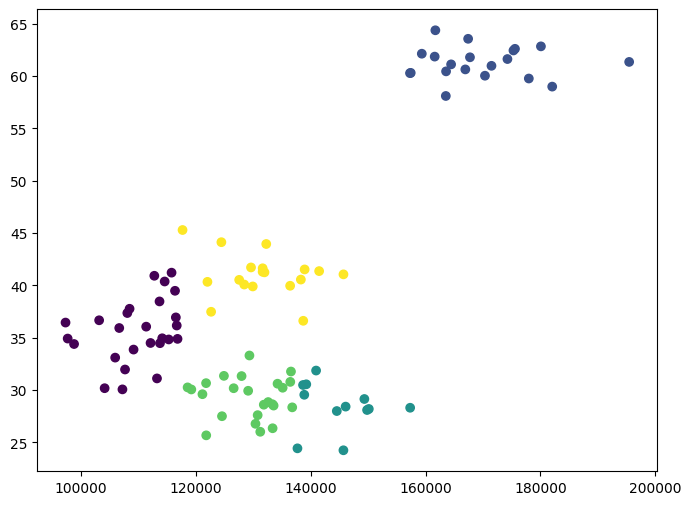

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0],data[:,1],
            c = model.labels_.astype(float))
plt.show()

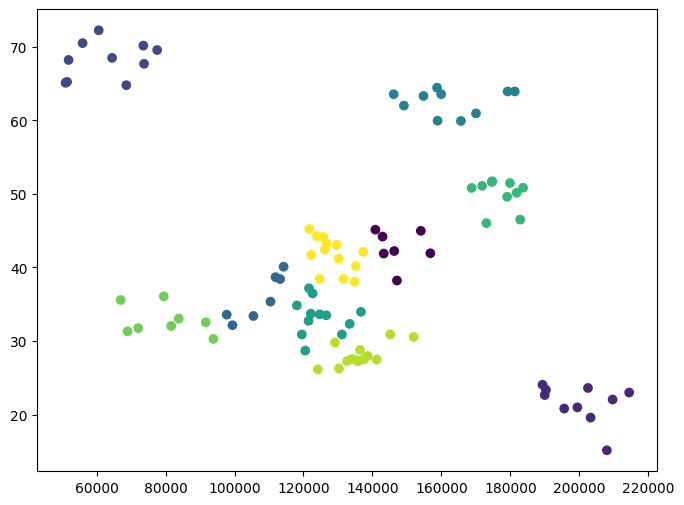

In [31]:
data = createClusteredData(100,10)
model = KMeans(n_clusters = 10)
model.fit(scale(data))
plt.figure(figsize=(8,6))
plt.scatter(data[:,0],data[:,1],
            c = model.labels_.astype(float))
plt.show()